# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [128]:
rta_df = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
rta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
rta_df.shape

(12316, 32)

In [8]:
rta_df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7527,17:25:00,Wednesday,Unknown,Male,Elementary school,Employee,1-2yr,Other,NaN,NaN,...,Moving Backward,na,na,na,na,Other,Normal,Not a Pedestrian,No distancing,Slight Injury
990,12:05:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Above 10yr,...,Going straight,na,na,na,na,Other,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
4809,17:10:00,Tuesday,31-50,Male,Elementary school,Owner,Below 1yr,Motorcycle,Owner,Above 10yr,...,Going straight,na,na,na,na,Other,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
11883,7:58:00,Monday,18-30,Male,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Owner,NaN,...,Going straight,Passenger,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Getting off the vehicle improperly,Slight Injury
9770,17:50:00,Saturday,18-30,Male,Junior high school,Employee,5-10yr,Pick up upto 10Q,Governmental,1-2yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
5242,18:20:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (13?45 seats),Owner,2-5yrs,...,Going straight,Driver or rider,Male,5,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
10199,18:56:00,Monday,Under 18,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Governmental,Unknown,...,Stopping,Driver or rider,Female,18-30,3,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury
4613,7:15:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Stationwagen,Owner,2-5yrs,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
6686,16:10:00,Sunday,18-30,Male,Elementary school,Employee,Above 10yr,Lorry (41?100Q),Organization,2-5yrs,...,Going straight,Pedestrian,Male,18-30,2,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury
11059,6:10:00,Friday,18-30,Male,Above high school,Employee,Above 10yr,Public (> 45 seats),Owner,Unknown,...,Moving Backward,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [58]:
rta_df['Area_accident_occured'].unique()

array(['Office areas', 'Residential areas', ' Industrial areas', 'Other',
       ' Church areas', '  Recreational areas', '  Market areas',
       'Rural village areas', ' Outside rural areas', ' Hospital areas',
       'School areas', 'Recreational areas', 'Unknown',
       'Rural village areasOffice areas'], dtype=object)

In [9]:
rta_df['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [17]:
rta_df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [19]:
rta_df['Fitness_of_casuality'].unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind', 'NormalNormal'],
      dtype=object)

In [22]:
rta_df[rta_df['Fitness_of_casuality'] == 'NormalNormal'].index

Index([  606,   924,  1623,  1941,  3485,  3803,  4502,  5263,  5913,  6231,
        6930,  7614,  7932,  8631,  9476,  9794, 10493, 11177, 11495],
      dtype='int64')

In [30]:
rta_df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [32]:
rta_df['Defect_of_vehicle'].unique()

array(['No defect', nan, '7', '5'], dtype=object)

In [33]:
rta_df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [11]:
rta_df['Accident_severity'].value_counts().sum()

12316

In [12]:
rta_df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [24]:
rta_df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [15]:
rta_df.duplicated().sum()

0

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [18]:
rta_df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [129]:
rta_df.drop(['Time', 'Day_of_week', 'Educational_level', 'Vehicle_driver_relation', 'Pedestrian_movement', 'Defect_of_vehicle', 'Sex_of_casualty', 'Owner_of_vehicle', 'Area_accident_occured', 'Fitness_of_casuality', 'Work_of_casuality'], axis=1, inplace=True)

In [130]:
rta_df['Service_year_of_vehicle'].fillna("Unknown", inplace=True)

In [72]:
rta_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 1 to 12315
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           10348 non-null  object
 1   Sex_of_driver                10348 non-null  object
 2   Driving_experience           10348 non-null  object
 3   Type_of_vehicle              10348 non-null  object
 4   Service_year_of_vehicle      10348 non-null  object
 5   Lanes_or_Medians             10348 non-null  object
 6   Road_allignment              10348 non-null  object
 7   Types_of_Junction            10348 non-null  object
 8   Road_surface_type            10348 non-null  object
 9   Road_surface_conditions      10348 non-null  object
 10  Light_conditions             10348 non-null  object
 11  Weather_conditions           10348 non-null  object
 12  Type_of_collision            10348 non-null  object
 13  Number_of_vehicles_involved  10348 n

In [36]:
rta_df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [41]:
rta_df.isnull().sum()

,0
Age_band_of_driver,0
Sex_of_driver,0
Driving_experience,829
Type_of_vehicle,950
Service_year_of_vehicle,0
Defect_of_vehicle,0
Area_accident_occured,239
Lanes_or_Medians,385
Road_allignment,142
Types_of_Junction,887


In [131]:
rta_df['Types_of_Junction'].fillna("Unknown", inplace=True)

In [132]:
rta_df['Driving_experience'].fillna("unknown", inplace=True)

In [133]:
rta_df.dropna(inplace=True)

In [134]:
rta_df.isnull().sum()

,0
Age_band_of_driver,0
Sex_of_driver,0
Driving_experience,0
Type_of_vehicle,0
Service_year_of_vehicle,0
Lanes_or_Medians,0
Road_allignment,0
Types_of_Junction,0
Road_surface_type,0
Road_surface_conditions,0


In [135]:
rta_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 1 to 12315
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           10348 non-null  object
 1   Sex_of_driver                10348 non-null  object
 2   Driving_experience           10348 non-null  object
 3   Type_of_vehicle              10348 non-null  object
 4   Service_year_of_vehicle      10348 non-null  object
 5   Lanes_or_Medians             10348 non-null  object
 6   Road_allignment              10348 non-null  object
 7   Types_of_Junction            10348 non-null  object
 8   Road_surface_type            10348 non-null  object
 9   Road_surface_conditions      10348 non-null  object
 10  Light_conditions             10348 non-null  object
 11  Weather_conditions           10348 non-null  object
 12  Type_of_collision            10348 non-null  object
 13  Number_of_vehicles_involved  10348 n

In [85]:
for col in rta_df.columns:
    print(col)
    print('\n')
    print(rta_df[col].unique())
    print('\n')

Age_band_of_driver


['31-50' '18-30' 'Under 18' 'Over 51']


Sex_of_driver


['Male' 'Female']


Driving_experience


['Above 10yr' '5-10yr' '2-5yr' '1-2yr' 'No Licence' 'Below 1yr' 'unknown']


Type_of_vehicle


['Public (> 45 seats)' 'Automobile' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']


Service_year_of_vehicle


['5-10yrs' 'Unknown' 'Above 10yr' '1-2yr' '2-5yrs' 'Below 1yr']


Lanes_or_Medians


['Undivided Two way' 'other' 'Double carriageway (median)' 'One way'
 'Two-way (divided with solid lines road marking)'
 'Two-way (divided with broken lines road marking)' 'Unknown']


Road_allignment


['Tangent road with flat terrain'
 'Tangent road with mild grade and flat terrain' 'Escarpments'
 'Tangent road with rolling terrain' 'Gentle horizontal curve'
 'Tangent road with mountainous terrain and'
 'Steep grade

In [136]:
rta_df = rta_df[rta_df['Sex_of_driver'] != 'Unknown']

In [79]:
rta_df['Sex_of_driver'].unique()

array(['Male', 'Female'], dtype=object)

In [140]:
rta_df['Age_band_of_driver'].unique()

array(['31-50', '18-30', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [138]:
rta_df = rta_df[rta_df['Age_band_of_casualty'] != '5']

In [91]:
for col in rta_df.columns:
    print(col)
    print('\n')
    print(rta_df[col].unique())
    print('\n')

Age_band_of_driver


['18-30' '31-50' 'Over 51' 'Under 18']


Sex_of_driver


['Male' 'Female']


Driving_experience


['5-10yr' 'Above 10yr' '1-2yr' 'No Licence' 'Below 1yr' '2-5yr' 'unknown']


Type_of_vehicle


['Public (> 45 seats)' 'Lorry (41?100Q)' 'Automobile' 'Long lorry'
 'Lorry (11?40Q)' 'Public (12 seats)' 'Taxi' 'Public (13?45 seats)'
 'Ridden horse' 'Other' 'Pick up upto 10Q' 'Bajaj' 'Turbo' 'Stationwagen'
 'Motorcycle' 'Special vehicle' 'Bicycle']


Service_year_of_vehicle


['Unknown' '1-2yr' '2-5yrs' '5-10yrs' 'Above 10yr' 'Below 1yr']


Lanes_or_Medians


['other' 'Undivided Two way' 'One way'
 'Two-way (divided with broken lines road marking)'
 'Double carriageway (median)'
 'Two-way (divided with solid lines road marking)' 'Unknown']


Road_allignment


['Tangent road with mild grade and flat terrain'
 'Tangent road with flat terrain' 'Escarpments'
 'Tangent road with rolling terrain' 'Gentle horizontal curve'
 'Tangent road with mountainous terrain and'
 'Steep grad

In [141]:
rta_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10003 entries, 1 to 12314
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           10003 non-null  object
 1   Sex_of_driver                10003 non-null  object
 2   Driving_experience           10003 non-null  object
 3   Type_of_vehicle              10003 non-null  object
 4   Service_year_of_vehicle      10003 non-null  object
 5   Lanes_or_Medians             10003 non-null  object
 6   Road_allignment              10003 non-null  object
 7   Types_of_Junction            10003 non-null  object
 8   Road_surface_type            10003 non-null  object
 9   Road_surface_conditions      10003 non-null  object
 10  Light_conditions             10003 non-null  object
 11  Weather_conditions           10003 non-null  object
 12  Type_of_collision            10003 non-null  object
 13  Number_of_vehicles_involved  10003 n

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [259]:
px.histogram(rta_df, x='Type_of_vehicle', color='Age_band_of_driver')

In [154]:
px.pie(rta_df, names='Cause_of_accident', title='Accident type ratios')

In [260]:
px.histogram(rta_df, x='Number_of_vehicles_involved', y='Number_of_casualties')

In [155]:
agg_rta = rta_df.groupby(['Cause_of_accident', 'Accident_severity']).agg(
    total_cause = ('Cause_of_accident', 'count'),
    total_vehicles = ('Number_of_vehicles_involved', 'sum'),
    total_casualties = ('Number_of_casualties', 'sum')
)

<Axes: xlabel='total_vehicles', ylabel='Cause_of_accident'>

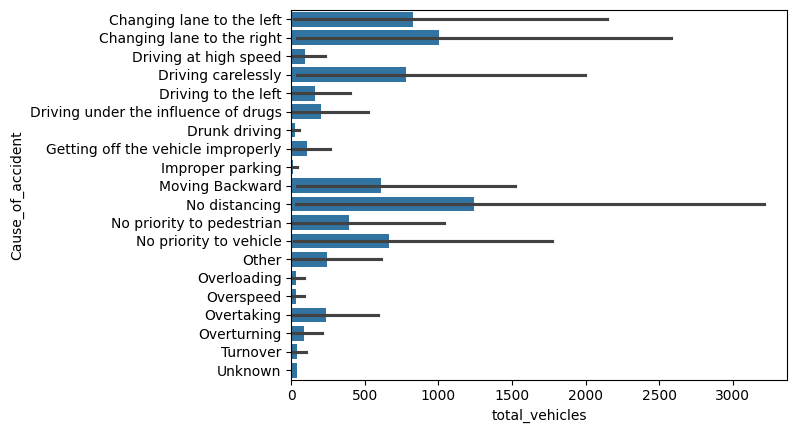

In [163]:
sns.barplot(agg_rta, x='total_vehicles', y='Cause_of_accident')

In [168]:
px.scatter(agg_rta, x='total_vehicles', y='total_casualties')

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [201]:
rta_df['Driving_experience'].value_counts()

,count
Driving_experience,
5-10yr,2732
2-5yr,2149
Above 10yr,1818
1-2yr,1436
Below 1yr,1108
unknown,665
No Licence,95


In [170]:
x = rta_df.drop('Accident_severity', axis=1)
y = rta_df['Accident_severity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [203]:
num_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']
cat_cols = ['Age_band_of_driver', 'Driving_experience', 'Service_year_of_vehicle', 'Road_surface_type', 'Road_surface_conditions', 'Casualty_class', 'Age_band_of_casualty', 'Casualty_severity']
age_driver_pos = ['Unknown', 'Under 18', '18-30', '31-50', 'Over 51']
driv_exp_pos = ['unknown', 'No Licence', 'Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr']
service_year_pos = ['Unknown', 'Below 1yr', '1-2yr', '2-5yrs', '5-10yrs', 'Above 10yr']
road_surface_pos = ['Asphalt roads', 'Earth roads', 'Gravel roads', 'Asphalt roads with some distress', 'Other']
road_condition_pos = ['Dry', 'Wet or damp', 'Snow', 'Flood over 3cm. deep']
cas_class_pos = ['na', 'Driver or rider', 'Passenger', 'Pedestrian']
age_cas_pos = ['na', 'Under 18', '18-30', '31-50', 'Over 51']
cas_sev_pos = ['na', '1', '2', '3']

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[age_driver_pos, driv_exp_pos, service_year_pos, road_surface_pos, road_condition_pos, cas_class_pos, age_cas_pos, cas_sev_pos]))
])


In [204]:
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

proc_x_train = preprocessing_pipeline.fit_transform(x_train)
proc_x_test = preprocessing_pipeline.transform(x_test)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [206]:
log_regression = LogisticRegression()
log_regression.fit(proc_x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#### Decision Tree Classifier

In [207]:
dec_tree_clas = DecisionTreeClassifier()
dec_tree_clas.fit(proc_x_train, y_train)

DecisionTreeClassifier()

#### Support Vector Machine (SVM)

In [208]:
svm = SVC()
svm.fit(proc_x_train, y_train)

SVC()

#### K-Neighbors Classifier

In [209]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(proc_x_train, y_train)

KNeighborsClassifier()

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [220]:
# Confusion matrix
y_log_pred = log_regression.predict(proc_x_test)
y_dec_pred = dec_tree_clas.predict(proc_x_test)
y_svm_pred = svm.predict(proc_x_test)
y_knn_pred = k_neighbor.predict(proc_x_test)

In [219]:
log_cm = confusion_matrix(y_test, y_log_pred)
log_cm

array([[   0,    0,   23],
       [   0,    0,  285],
       [   0,    0, 1693]])

In [218]:

dec_cm = confusion_matrix(y_test, y_dec_pred)
dec_cm

array([[   3,    3,   17],
       [   5,   55,  225],
       [  21,  236, 1436]])

In [217]:
svm_cm = confusion_matrix(y_test, y_svm_pred)
svm_cm

array([[   0,    0,   23],
       [   0,    0,  285],
       [   0,    0, 1693]])

In [216]:
knn_cm = confusion_matrix(y_test, y_knn_pred)
knn_cm

array([[   1,    0,   22],
       [   0,   23,  262],
       [   2,   65, 1626]])

In [221]:
# Accuracy
accuracy_score(y_test, y_log_pred)

0.8460769615192404

In [222]:
accuracy_score(y_test, y_dec_pred)

0.7466266866566716

In [223]:
accuracy_score(y_test, y_svm_pred)

0.8460769615192404

In [224]:
accuracy_score(y_test, y_knn_pred)

0.8245877061469266

In [253]:
# Recall and precision for logistic
precision_score(y_test, y_log_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.7158462248136301

In [230]:
recall_score(y_test, y_log_pred, average='weighted')

0.8460769615192404

In [231]:
# Recall and precision for decision tree
precision_score(y_test, y_dec_pred, average='weighted')

0.7518902285082095

In [232]:
recall_score(y_test, y_dec_pred, average='weighted')

0.7466266866566716

In [249]:
# Recall and precision for svm
precision_score(y_test, y_svm_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.7158462248136301

In [234]:
recall_score(y_test, y_svm_pred, average='weighted')

0.8460769615192404

In [235]:
# Recall and precision for k-neighbor
precision_score(y_test, y_knn_pred, average='weighted')

0.7613299708229339

In [236]:
recall_score(y_test, y_knn_pred, average='weighted')

0.8245877061469266

In [237]:
# F1 score for logistic
f1_score(y_test, y_log_pred, average='weighted')

0.7755323745815236

In [238]:
# F1 score for decision
f1_score(y_test, y_dec_pred, average='weighted')

0.7492197497186491

In [239]:
# F1 score for svm
f1_score(y_test, y_svm_pred, average='weighted')

0.7755323745815236

In [240]:
# F1 score for k-neighbor
f1_score(y_test, y_knn_pred, average='weighted')

0.7821022616529625

In [ ]:
# AUC and ROC curve, please note that the code recieves an error, the error reveals that multiclass formats within my y_score and y_test are not supported

y_log_scores = log_regression.decision_function(proc_x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_log_scores)
auc(fpr, tpr)

y_dec_scores = log_regression.decision_function(proc_x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_log_scores)
auc(fpr, tpr)

y_svm_scores = log_regression.decision_function(proc_x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_log_scores)
auc(fpr, tpr)

y_kn_scores = log_regression.decision_function(proc_x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_log_scores)
auc(fpr, tpr)


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

In [ ]:
# Best Accuracy across the models
# The best accuracy models was the SVM (Support vector machine) and logistics regression

# Reasoning
# I believe the k-neighbor is the best model overall since it had the best f1 score which calculated the mean between the precision and recall since it is the simplest method of grouping data together

# Feature importance
# I believe that the most important features were by far the casualty_severity, number_of_vehicles_involved, and vehicle_year_of_service, mainly because they relate the most to the label i am trying to predict

# Model Limitations
# The main limitation of the model was the oversampling, the amount of labels that were labelled 'slightly injured' were higher then the other both labels present

# Future improvements
# For future improvements in terms of further steps I could have taken, it would be handelling the data and addressing the oversampling issue before running out of time